[![Environment Setup Video](images/setup-video.jpg)](https://www.youtube.com/watch?v=XG44LZIgcuI "Environment Setup Video")

# E-Commerce Data Analysis
Perform Data Analysis and data Visualization on a real e-commerce transactions dataset of online purchases made for a whole year. Analyze and Visualize trendz and shortcomings by applying Data analysis skills and tools to glean information from real-life raw data
This project's Jupyter Notebook can be downloaded for follow-along coding from the Project Portfolio website: \
        https://d3reelqic2he7d.cloudfront.net    \
Click on this Project's page and scroll down to the download link at the bottom.
This Jupyter Notebook and this video's description has a link to download the e-comm retail datset.

In [1]:
# Check the version of python that we are working on
!python --version

Python 3.8.8


In [2]:
# import the matplotlib library
from importlib.metadata import version
import matplotlib.pyplot as plt
version('matplotlib')
# Note the version of matplotlib that we are working with

'3.3.4'

In [3]:
# import the pandas library
import pandas as pd
pd.__version__
# Note the version of pandas that we are working with

'1.2.4'

In [4]:
# import the numpy library
import numpy as np
np.__version__
# Note the version of numpy that we are working with

'1.20.1'

In [5]:
# import the seaborn library
import seaborn as sns
sns.__version__
# Note the version of seaborn that we are working with

'0.11.1'

## Read in the Data

## Data Source:
### Thanks to UCI Machine Learning Repository
#### https://archive.ics.uci.edu/ml/datasets/Online+Retail
#### Citation: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml].
#### Irvine, CA: University of California, School of Information and Computer Science

### Data Set Factual (REAL) Information:
This is a transnational data set which contains all the transactions occurring between 12/01/2010 and 12/09/2011   
for a UK-based and registered non-store online retailer.The company mainly sells unique all-occasion gifts.   
Many customers of the company are wholesalers.  

### Data Set Fictional (Fairy-Tale) Assumptions:  
These are daily invoices from a branch of the fictional trans-global online retailer ALIZON.COM  
All prices are in the favorite international currency of US dollars.   
You are the hot-shot Consulting Data Analyst hired to glean information from this ecomm transactions data set.  

In [6]:
# Read in the data provided as an excel spreadsheet
retail_df=pd.read_excel("data/Online Retail.xlsx")
retail_df
# These half a million data rows will take almost 2 minutes to load, so please be patient

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Preliminary Data Analysis

In [7]:
# How many rows and columns are in the dataframe?
retail_df.shape
# we have over half a million data points with 8 attributes each

(541909, 8)

In [8]:
output = len(retail_df)
print("{:,}".format(output))
# We have 541,909 rows in our dataframe

541,909


In [9]:
# How are the dataframe rows indexed?
retail_df.index
# They have the default integer index starting from 0 to 541908

RangeIndex(start=0, stop=541909, step=1)

In [10]:
# What are the column names in the dataframe?
retail_df.columns
# Note that there is a StockCode and a Description column to identify items sold     

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# What data type are the columns in the dataframe?
retail_df.info()
# Note that Invoice-Date column has been read in as a date column.
# Also, the unit price and the quantity columns are numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Munging & Data Wrangling
Cleaning up the data

In [12]:
# What is the date of the earliest transaction?
retail_df.InvoiceDate.min()
# Our first invoice is dated 1st December 2010

Timestamp('2010-12-01 08:26:00')

In [13]:
# What is the date of the latest transaction?
retail_df.InvoiceDate.max()
# Our last invoice is dated 9th Dec 2011
# We have over one years worth of invoice data

Timestamp('2011-12-09 12:50:00')

In [14]:
# What is the time span of our dataset?
retail_df.InvoiceDate.max() - retail_df.InvoiceDate.min()
# We have over 373 days worth of data

Timedelta('373 days 04:24:00')

In [15]:
# Let us work with exactly one year of data
start_date = '12-01-2010'
end_date = '11-30-2011'
start_date, end_date
# we defined the boundary dates

('12-01-2010', '11-30-2011')

In [16]:
# Create a mask with the date boundaries
date_mask = (retail_df['InvoiceDate'] >= start_date) & (retail_df['InvoiceDate']  <= end_date)
date_mask

0          True
1          True
2          True
3          True
4          True
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceDate, Length: 541909, dtype: bool

In [17]:
# Overwrite the retail dataset with the filtered invoices 
retail_df = retail_df.loc[date_mask].copy()
retail_df
# Now our sample datframe has exactly one years worth of online sales Invoices 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom
512926,579520,23344,JUMBO BAG 50'S CHRISTMAS,1,2011-11-29 18:14:00,2.08,12748.0,United Kingdom
512927,C579521,22307,GOLD MUG BONE CHINA TREE OF LIFE,-6,2011-11-29 18:19:00,1.06,12748.0,United Kingdom
512928,C579521,21843,RED RETROSPOT CAKE STAND,-1,2011-11-29 18:19:00,10.95,12748.0,United Kingdom


In [18]:
# Disable the dataframe's is-copy flag to suppress some pesky flase positive SettingWithCopyWarning messages
# retail_df.is_copy = False

In [19]:
# how many values in each of the columns are null?
retail_df.isnull().sum()
# Over 125,000 CustomerIDs and nearly 1500 Descriptions are null.

InvoiceNo           0
StockCode           0
Description      1435
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     125957
Country             0
dtype: int64

In [20]:
# how many data rows remain if we remove all rows that do not have 'any' one of the critical, 'list'ed values?
clean_rows = retail_df.dropna(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'UnitPrice', 'CustomerID'], how='any').shape[0] 
print("{:,}".format(clean_rows))
# We will still have almost 387,000 data rows to work with.
# From now on, I will leave output formatting as an exercise for you guys

386,973


In [21]:
# How many data rows will we lose after the purge? what %age of data rows are circumspect?
lost_rows = retail_df.shape[0] - clean_rows
lost_rows, (lost_rows/retail_df.shape[0] * 100)
# We see that the major culprit is the CustomerID column.
# Make a note to check with Alizon Management, data security Dept. 
# Have 25% of CustomerIDs been selectively blanked out of the sample data set?
# Or worse, have 25% data rows been superficially added to boost sales figures?

(125957, 24.556372214532196)

In [22]:
# Remove all rows that do not have 'any' one of the critical, 'list'ed values
retail_df.dropna(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'UnitPrice', 'CustomerID'], how='any', inplace=True)
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom
512926,579520,23344,JUMBO BAG 50'S CHRISTMAS,1,2011-11-29 18:14:00,2.08,12748.0,United Kingdom
512927,C579521,22307,GOLD MUG BONE CHINA TREE OF LIFE,-6,2011-11-29 18:19:00,1.06,12748.0,United Kingdom
512928,C579521,21843,RED RETROSPOT CAKE STAND,-1,2011-11-29 18:19:00,10.95,12748.0,United Kingdom


In [23]:
# Disable the dataframe's is-copy flag to suppress some pesky flase positive SettingWithCopyWarning messages
retail_df.is_copy = False

In [24]:
# Do we still have null values in any of the data frame columns?
retail_df.isnull().sum()
# We do not have any NaNs in our data frame

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
# How many Cancelled invoices do we have?
inv_mask = (retail_df['InvoiceNo'].str[0] == 'C')
retail_df.loc[inv_mask]
# Nearly 8,500 data rows are for cancelled invoices.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
511481,C579502,22946,WOODEN ADVENT CALENDAR CREAM,-1,2011-11-29 16:19:00,16.95,16759.0,United Kingdom
512879,C579519,23139,SINGLE WIRE HOOK PINK HEART,-12,2011-11-29 18:11:00,1.45,12748.0,United Kingdom
512927,C579521,22307,GOLD MUG BONE CHINA TREE OF LIFE,-6,2011-11-29 18:19:00,1.06,12748.0,United Kingdom
512928,C579521,21843,RED RETROSPOT CAKE STAND,-1,2011-11-29 18:19:00,10.95,12748.0,United Kingdom


In [26]:
# Remove cancelled invoices from our analysis
retail_df = retail_df.loc[~inv_mask]
retail_df
# We negated the mask to exclude cancelled invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
512922,579520,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom
512923,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom
512924,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom


In [27]:
# Disable the dataframe's is-copy flag to suppress flase positive SettingWithCopyWarning messages
retail_df.is_copy = False

In [28]:
# Do we have any 0s or -ve numbers in our numeric columns?
(retail_df['CustomerID'] <= 0).sum()
# CustomerID column is good

0

In [29]:
# Do we have any 0s or -ve unit price? what %age of our rows are invalid? 
price_0_rows = (retail_df['UnitPrice'] <= 0).sum()
price_0_rows, np.round(price_0_rows / retail_df.shape[0] * 100, 2)
# 40 rows or about 1% of our data rows have an invalid price

(40, 0.01)

In [30]:
# Check out the data rows that have 0 or -ve unit price?
price_mask = (retail_df['UnitPrice'] <= 0)
retail_df.loc[price_mask]
# All 40 invoices have 0 unit price
# Also there are some StockCode 'Manual' entries that we have to deal with later

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [31]:
# Remove 0 unit priced invoices from our analysis
retail_df = retail_df.loc[~price_mask]
retail_df
# We negated the mask to exclude 0 unit priced invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
512922,579520,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom
512923,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom
512924,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom


In [32]:
# Now do we have any 0s or -ve numbers in our 'unit price' colums?
(retail_df['UnitPrice'] <= 0).sum()
# UnitPrice column is good

0

In [33]:
# Disable the dataframe's is-copy flag to suppress flase positive SettingWithCopyWarning messages
retail_df.is_copy = False

In [34]:
# Do we have any 0 or -ve quantity?
(retail_df['Quantity'] <= 0).sum()
# Quantity column is good

0

In [35]:
# Checkout invoices with StockCode 'M'
stock_mask = (retail_df['StockCode'] == 'M')
retail_df.loc[stock_mask]
# Since we are analysing e-comm transactions we will consider manual entries as corrupt data.
# However, check with alizon.com's inventory Dept. the reason for manual entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
...,...,...,...,...,...,...,...,...
491783,578074,M,Manual,1,2011-11-22 16:06:00,1.25,17590.0,United Kingdom
500329,578757,M,Manual,2,2011-11-25 11:41:00,0.85,12748.0,United Kingdom
504012,578941,M,Manual,6,2011-11-27 13:26:00,0.39,16024.0,United Kingdom
504025,578941,M,Manual,14,2011-11-27 13:26:00,0.21,16024.0,United Kingdom


In [36]:
# How many invoices with StockCode 'M' do we have? what %age of our rows are Manual Entries? 
manual_rows = (retail_df['StockCode'] == 'M').sum()
manual_rows, np.round(manual_rows / retail_df.shape[0] * 100, 2)
# 275 rows or about 7 % of our data rows are Manual Entries

(275, 0.07)

In [37]:
# Remove Manually Entered invoices from our analysis
retail_df = retail_df.loc[~stock_mask]
retail_df
# We negated the mask to exclude invoices with StockCode 'M'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
512922,579520,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom
512923,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom
512924,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom


In [38]:
# Disable the dataframe's is-copy flag to suppress flase positive SettingWithCopyWarning messages
retail_df.is_copy = False

In [39]:
# Do we have any invoices with blank Description?
desc_mask = (retail_df['Description'] == '')
retail_df.loc[desc_mask]
# We do not have any blank Descriptions.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [40]:
# Disable the dataframe's is-copy flag to suppress flase positive SettingWithCopyWarning messages
retail_df = retail_df.copy() 

In [41]:
# We need to add one more calculated column for our data anlysis
retail_df['TotalPrice'] = retail_df['UnitPrice'] * retail_df['Quantity'] 
retail_df
# We will keep that column in the very end to remind us that it is an added column

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
512922,579520,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom,0.39
512923,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom,0.29
512924,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom,0.29
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom,0.39


In [42]:
# Disable the dataframe's is-copy flag to suppress flase positive SettingWithCopyWarning messages
retail_df.is_copy = False

In [43]:
# Make the CustomerId a string column
retail_df = retail_df.astype({'CustomerID': 'int64'})
retail_df
# We first convert the column to an integer to get rid of the trailing .0s

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
512922,579520,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-11-29 18:14:00,0.39,12748,United Kingdom,0.39
512923,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748,United Kingdom,0.29
512924,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748,United Kingdom,0.29
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748,United Kingdom,0.39


In [44]:
retail_df = retail_df.astype({'CustomerID': 'string'})
retail_df.info()
# Now CustomerID is a string column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378185 entries, 0 to 512926
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    378185 non-null  object        
 1   StockCode    378185 non-null  object        
 2   Description  378185 non-null  object        
 3   Quantity     378185 non-null  int64         
 4   InvoiceDate  378185 non-null  datetime64[ns]
 5   UnitPrice    378185 non-null  float64       
 6   CustomerID   378185 non-null  string        
 7   Country      378185 non-null  object        
 8   TotalPrice   378185 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), string(1)
memory usage: 28.9+ MB


## Alizon.com's Bottom line
What was alizon.com's turnover in the year 2011?

In [45]:
# Simple, add all TotalPrices, And round off the pennies
total_sales = round(retail_df.TotalPrice.sum())
total_sales
# We made over 8 and a quarter million dollars in 2011!

8298393

## Alizon.com's Best Selling Items

In [46]:
# Which is our best selling item, sale-amount wise?
best_selr_df = retail_df.groupby('Description').sum() \
                [['Quantity', 'TotalPrice']].sort_values('TotalPrice', ascending=False).head(10)
best_selr_df.reset_index(inplace=True)
best_selr_df
# That is the list of our top selling items, dollar amount wise
# Note that the backslash in the code is merely to allow continuity to next line 

,Description,Quantity,TotalPrice
0,REGENCY CAKESTAND 3 TIER,11981,137706.97
1,WHITE HANGING HEART T-LIGHT HOLDER,35669,97637.31
2,JUMBO BAG RED RETROSPOT,44974,82913.22
3,MEDIUM CERAMIC TOP STORAGE JAR,77668,81147.05
4,POSTAGE,2972,74510.96
5,PARTY BUNTING,15187,68329.53
6,ASSORTED COLOUR BIRD ORNAMENT,33976,54391.60
7,CHILLI LIGHTS,9222,44124.09
8,RABBIT NIGHT LIGHT,23175,43828.03
9,PICNIC BASKET WICKER 60 PIECES,61,39619.50


Text(0.5, 1.0, "Alizon.com's Hot 10 Best Sellers")

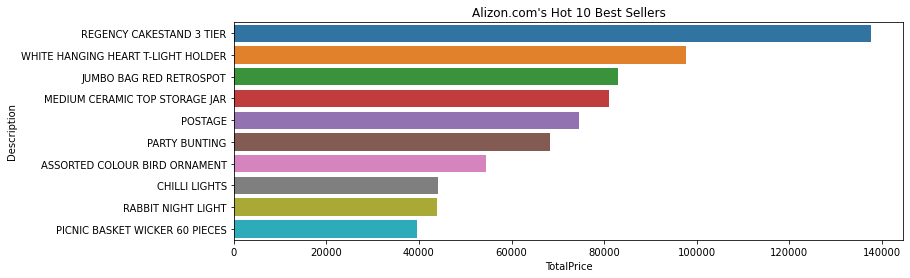

In [47]:
# Draw a horizontal bar plot for TotalPrice on the top 10 selling items, value wise
plt.figure(figsize=(12, 4))
sns.barplot(data=best_selr_df, x='TotalPrice', y='Description')
plt.title("Alizon.com's Hot 10 Best Sellers")
# REGENCY CAKESTAND 3 TIER is our runaway winner
# Note that Postage is in the top 5 revenue generators

In [48]:
# Which is our best selling item, quantity wise?
best_nmbr_df = retail_df.groupby('Description').sum() \
                [['Quantity', 'TotalPrice']].sort_values('Quantity', ascending=False).head(10)
best_nmbr_df.reset_index(inplace=True)
best_nmbr_df
# That is the list of our top selling items, quantity volume wise

,Description,Quantity,TotalPrice
0,MEDIUM CERAMIC TOP STORAGE JAR,77668,81147.05
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,52812,13140.00
2,JUMBO BAG RED RETROSPOT,44974,82913.22
3,WHITE HANGING HEART T-LIGHT HOLDER,35669,97637.31
4,ASSORTED COLOUR BIRD ORNAMENT,33976,54391.60
5,PACK OF 72 RETROSPOT CAKE CASES,33186,16126.38
6,MINI PAINT SET VINTAGE,25677,15776.95
7,POPCORN HOLDER,25210,19169.36
8,PACK OF 12 LONDON TISSUES,24684,7039.16
9,PACK OF 60 PINK PAISLEY CAKE CASES,23924,11441.30


Text(0.5, 1.0, "Alizon.com's Hot 10 Volume Sellers")

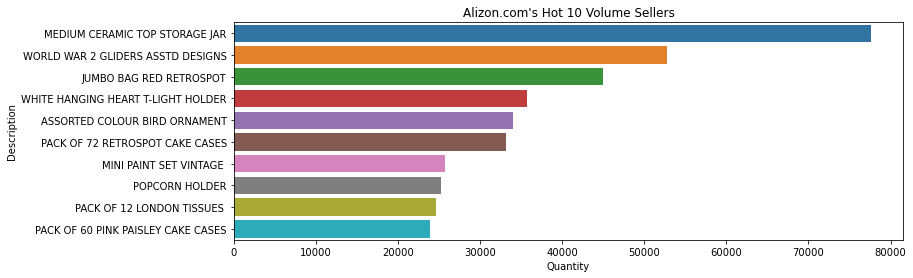

In [49]:
# Draw a horizontal bar plot for Quantity on the top 10 selling items, volume wise
plt.figure(figsize=(12, 4))
sns.barplot(data=best_nmbr_df, x='Quantity', y='Description')
plt.title("Alizon.com's Hot 10 Volume Sellers")
# Note that there is quite bit of overlap between the top value sellers and volume sellers

## Alizon.com's Best Value Customers

In [50]:
# who is alizon.coms best value customer?
all_cust_df = retail_df.groupby('CustomerID').sum(numeric_only=True)[['Quantity','TotalPrice' ]]
all_cust_df
# Grouping by customers, we aggregated the numeric columns.
# Then we created an all customer dataframe with index CustomerID and columns Quantity and TotalPrice

,Quantity,TotalPrice
CustomerID,,
12346,74215,77183.60
12347,2266,4085.18
12348,2341,1797.24
12349,631,1757.55
12350,197,334.40
...,...,...
18280,45,180.60
18281,54,80.82
18282,75,100.21


<AxesSubplot:xlabel='CustomerID'>

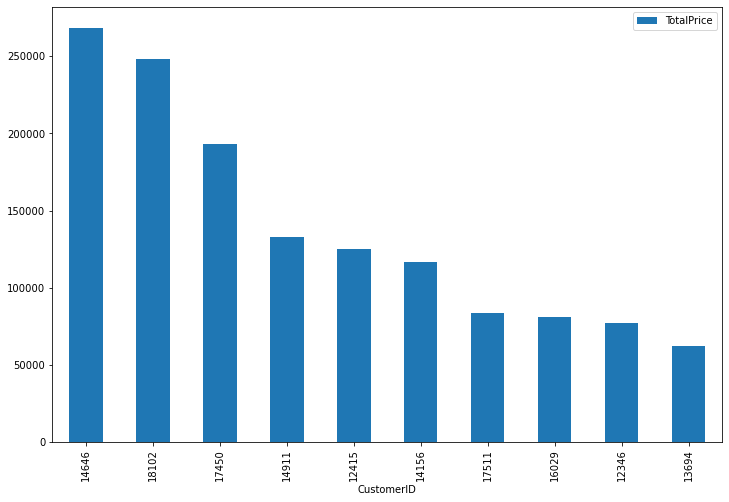

In [51]:
# Plot a barplot of the top ten alizon.com customers by value of Invoices
all_cust_df[['TotalPrice']].sort_values('TotalPrice', ascending=False).head(10).plot.bar(figsize=(12, 8))
# We see that Customer# 14646 is in the lead with Customer# 18102 close behind

In [52]:
# Create a Rank-by-value column in the top customer dataframe ranking by by TotalPrice
all_cust_df['RankByValue'] = all_cust_df['TotalPrice'].rank(ascending=False)
all_cust_df
# Note that the all customer dataframe is still indexed and sorted by CustomerID. 

,Quantity,TotalPrice,RankByValue
CustomerID,,,
12346,74215,77183.60,9.0
12347,2266,4085.18,338.0
12348,2341,1797.24,939.0
12349,631,1757.55,967.0
12350,197,334.40,3050.0
...,...,...,...
18280,45,180.60,3717.0
18281,54,80.82,4187.0
18282,75,100.21,4132.0


In [53]:
# Create a dataframe of the top 10 value customers
ten_val_cust_df = all_cust_df.sort_values('RankByValue').head(10).reset_index()
ten_val_cust_df = ten_val_cust_df.set_index('RankByValue')
ten_val_cust_df
# we set the index to the Rank-by-value coulmn

,CustomerID,Quantity,TotalPrice
RankByValue,,,
1.0,14646,188957,268478.00
2.0,18102,61426,248171.76
3.0,17450,69273,192988.39
4.0,14911,76084,132637.87
5.0,12415,77374,124914.53
6.0,14156,57531,116618.92
7.0,17511,57334,83683.06
8.0,16029,40208,81024.84
9.0,12346,74215,77183.60


Text(0.5, 1.0, "Alizon.com's Top 10 value Customers")

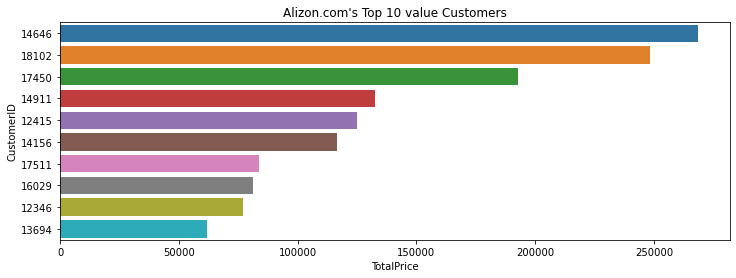

In [54]:
# Draw a horizontal bar plot for TotalPrice on the best value customer dataframe, top 10 customers
plt.figure(figsize=(12, 4))
sns.barplot(data=ten_val_cust_df, x='TotalPrice', y='CustomerID')
plt.title("Alizon.com's Top 10 value Customers")

<AxesSubplot:ylabel='TotalPrice'>

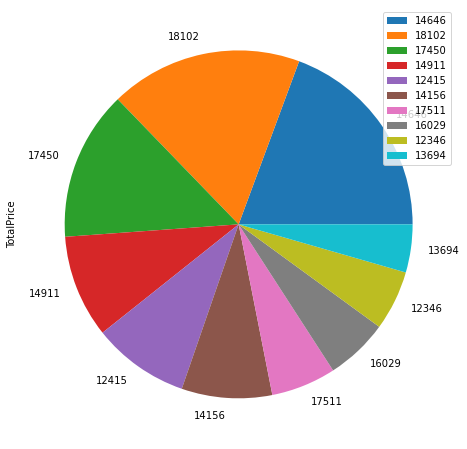

In [55]:
# Draw a pie plot of Alizon.com's top 10 Value Customers
all_cust_df.sort_values('RankByValue').head(10).plot.pie(figsize=(8, 8), y='TotalPrice')
# Customer# 14646 is Alizon.com's best value customer, with customer# 18102 a close second.

## Alizon.com's Best Volume Customers

<AxesSubplot:xlabel='CustomerID'>

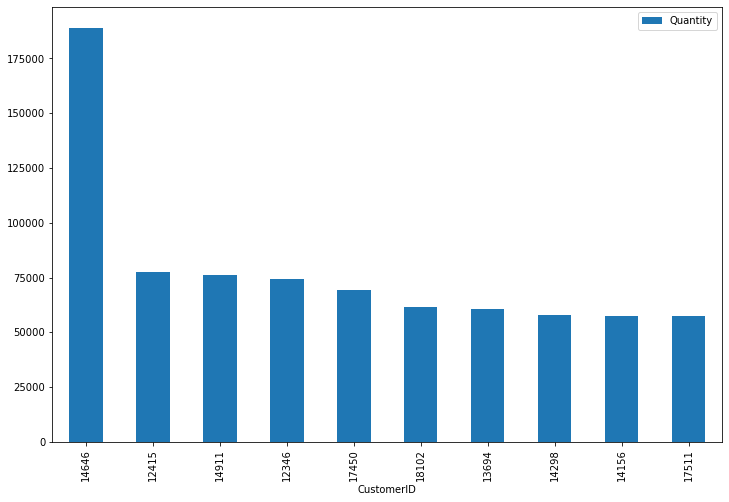

In [56]:
# Plot a barplot of the top ten alizon.com customers by volume of Invoices
all_cust_df[['Quantity']].sort_values('Quantity', ascending=False).head(10).plot.bar(figsize=(12, 8))
# We see that Customer# 14646 is well in the lead with Customer# 12415 far behind

In [57]:
# Create a Rank-by-volume column in the top customer dataframe ranking by by Quantity purchased
all_cust_df['RankByVolume'] = all_cust_df['Quantity'].rank(ascending=False)
all_cust_df
# Grouping by customers, we created a best value customer dataframe witha 'Rank' column. 

,Quantity,TotalPrice,RankByValue,RankByVolume
CustomerID,,,,
12346,74215,77183.60,9.0,4.0
12347,2266,4085.18,338.0,367.5
12348,2341,1797.24,939.0,356.0
12349,631,1757.55,967.0,1517.0
12350,197,334.40,3050.0,2944.0
...,...,...,...,...
18280,45,180.60,3717.0,4075.5
18281,54,80.82,4187.0,4015.5
18282,75,100.21,4132.0,3859.0


In [58]:
# Create a dataframe of the top 10 Volume customers
ten_vol_cust_df = all_cust_df.sort_values('RankByVolume').head(10).reset_index()
ten_vol_cust_df = ten_vol_cust_df.set_index('RankByVolume')
ten_vol_cust_df
# we set the index to the Rank-by-Volume coulmn

,CustomerID,Quantity,TotalPrice,RankByValue
RankByVolume,,,,
1.0,14646,188957,268478.00,1.0
2.0,12415,77374,124914.53,5.0
3.0,14911,76084,132637.87,4.0
4.0,12346,74215,77183.60,9.0
5.0,17450,69273,192988.39,3.0
6.0,18102,61426,248171.76,2.0
7.0,13694,60872,61908.46,10.0
8.0,14298,57983,50889.70,17.0
9.0,14156,57531,116618.92,6.0


Text(0.5, 1.0, "Alizon.com's Top 10 Volume Customers")

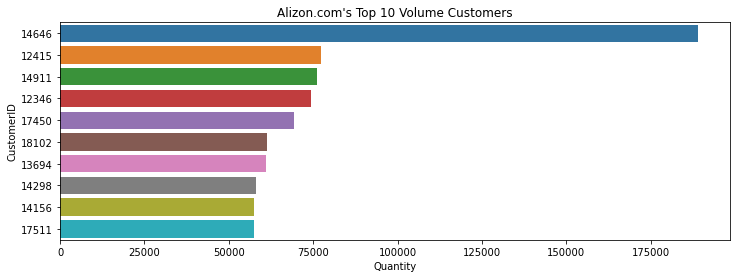

In [59]:
# Draw a horizontal bar plot for Quantity on the best Volume customer dataframe, top 10 customers
plt.figure(figsize=(12, 4))
sns.barplot(data=ten_vol_cust_df, x='Quantity', y='CustomerID')
plt.title("Alizon.com's Top 10 Volume Customers")
# Customer# 14646 is alizon.com's best Volume customer, by far 

<AxesSubplot:ylabel='Quantity'>

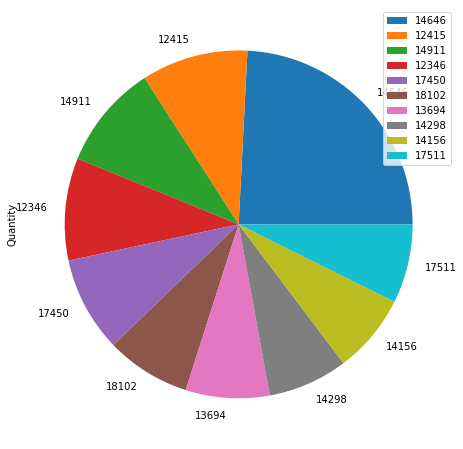

In [60]:
# Draw a pie plot of Alizon.com's top 10 Volume Customers
all_cust_df.sort_values('RankByVolume').head(10).plot.pie(figsize=(8, 8), y='Quantity')

## Alizon.com's Best Value Customer Base

In [61]:
# which country is alizon.com's best value customer base?
all_ctry_df = retail_df.groupby('Country').sum(numeric_only=True)[['Quantity','TotalPrice' ]]
all_ctry_df
# Grouping by Country, we aggregated the numeric columns.
# Then we created an all country dataframe with index Country and columns Quantity and TotalPrice

,Quantity,TotalPrice
Country,,
Australia,83901,1.385213e+05
Austria,4733,9.515480e+03
Bahrain,260,5.484000e+02
Belgium,22136,3.977861e+04
Brazil,356,1.143600e+03
Canada,2763,3.666380e+03
Channel Islands,9430,1.995904e+04
Cyprus,6360,1.326969e+04
Czech Republic,671,8.267400e+02


In [62]:
# Sort the all country dataframe on the Total price column 
all_ctry_df.sort_values('TotalPrice', ascending=False).head(10)
# Viewing the top 10 customer countries, UK is by far the leading customer base

,Quantity,TotalPrice
Country,,
United Kingdom,3970908,6.784347e+06
Netherlands,192352,2.735993e+05
EIRE,135740,2.535980e+05
Germany,114986,2.179073e+05
France,106113,1.894412e+05
Australia,83901,1.385213e+05
Spain,27666,6.126090e+04
Switzerland,30082,5.644395e+04
Belgium,22136,3.977861e+04


<AxesSubplot:xlabel='Country'>

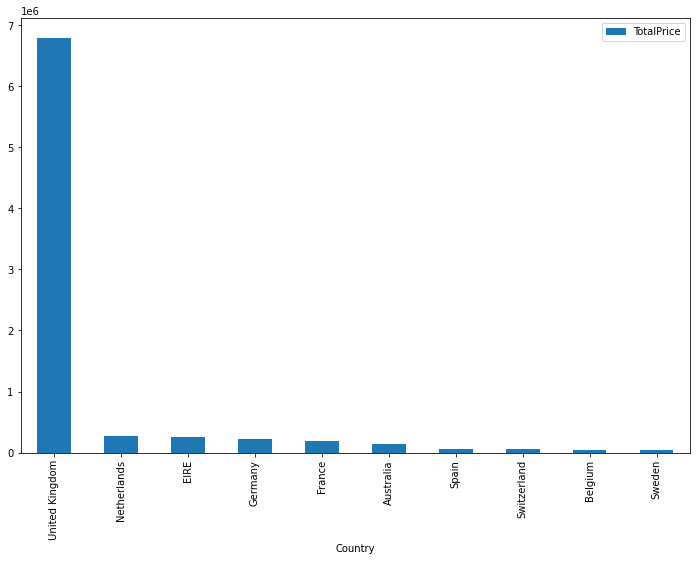

In [63]:
# Plot a barplot of the top ten alizon.com country-bases by value of Invoices
all_ctry_df[['TotalPrice']].sort_values('TotalPrice', ascending=False).head(10).plot.bar(figsize=(12, 8))
# We see that value-wise UK is well in the lead with Netherlands a distant second

<AxesSubplot:xlabel='Country'>

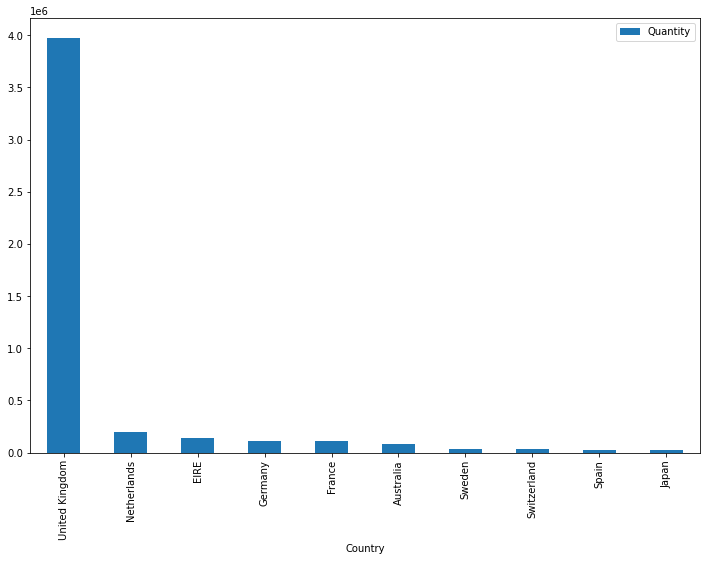

In [64]:
# Plot a barplot of the top ten alizon.com country-bases by volume of Invoices
all_ctry_df[['Quantity']].sort_values('Quantity', ascending=False).head(10).plot.bar(figsize=(12, 8))
# We see that volume-wise also, UK is well in the lead with Netherlands a distant second

In [65]:
# Compute UK's value and volume as a %age of the Total value and volume of Invoices
(
round(all_ctry_df.loc['United Kingdom','TotalPrice'] / all_ctry_df.TotalPrice.sum() * 100), 
round(all_ctry_df.loc['United Kingdom','Quantity'] / all_ctry_df.Quantity.sum() * 100)
)
# At an overwhelming 82% we will conclude that UK is the home branch of this alizon.com invoices dataset. 

(82, 82)

In [66]:
# To analyze Export performance, we will filter out the UK based Invoices from our countries dataframe
expo_ctry_df = all_ctry_df.sort_values('TotalPrice', ascending=False)[1:].copy()
expo_ctry_df
# Our export countries dataframe is indexed by coutnry names and sorted by TotalPrice of Invoices

,Quantity,TotalPrice
Country,,
Netherlands,192352,273599.32
EIRE,135740,253598.00
Germany,114986,217907.32
France,106113,189441.17
Australia,83901,138521.31
Spain,27666,61260.90
Switzerland,30082,56443.95
Belgium,22136,39778.61
Sweden,36042,38110.33


## Alizon.com's Exports Analysis

## Reporting
We generate some reports requested by the various Sales and Marketing Executives of alizon.com

### Generate a Report of Country-wise Sales Invoices

In [67]:
# Review the retail invoices dataframe
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
512922,579520,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-11-29 18:14:00,0.39,12748,United Kingdom,0.39
512923,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748,United Kingdom,0.29
512924,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748,United Kingdom,0.29
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748,United Kingdom,0.39


In [68]:
# Create a dataframe of the Invoice Header Information 
inv_heads_df = retail_df.drop_duplicates(subset = ['InvoiceNo'])[['InvoiceNo', 'InvoiceDate','CustomerID', 'Country']].copy()
inv_heads_df
# Note that we have 17,591 Invoice headers

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,2010-12-01 08:26:00,17850,United Kingdom
7,536366,2010-12-01 08:28:00,17850,United Kingdom
9,536367,2010-12-01 08:34:00,13047,United Kingdom
21,536368,2010-12-01 08:34:00,13047,United Kingdom
25,536369,2010-12-01 08:35:00,13047,United Kingdom
...,...,...,...,...
512680,579515,2011-11-29 17:23:00,14191,United Kingdom
512699,579516,2011-11-29 17:52:00,17841,United Kingdom
512857,579517,2011-11-29 18:02:00,12748,United Kingdom
512864,579518,2011-11-29 18:05:00,12748,United Kingdom


In [69]:
# Inspect the column data types of the invoice header dataframe
inv_heads_df.info()
# Note that InvoiceDate is of type object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17591 entries, 0 to 512880
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    17591 non-null  object        
 1   InvoiceDate  17591 non-null  datetime64[ns]
 2   CustomerID   17591 non-null  string        
 3   Country      17591 non-null  object        
dtypes: datetime64[ns](1), object(2), string(1)
memory usage: 687.1+ KB


In [70]:
# Trim away the trailing time part in the InvoiceDate column
inv_heads_df['InvoiceDate'] = pd.to_datetime(inv_heads_df['InvoiceDate']).dt.normalize()
inv_heads_df
# We have also converted the InvoiceDate to a datetime column

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,2010-12-01,17850,United Kingdom
7,536366,2010-12-01,17850,United Kingdom
9,536367,2010-12-01,13047,United Kingdom
21,536368,2010-12-01,13047,United Kingdom
25,536369,2010-12-01,13047,United Kingdom
...,...,...,...,...
512680,579515,2011-11-29,14191,United Kingdom
512699,579516,2011-11-29,17841,United Kingdom
512857,579517,2011-11-29,12748,United Kingdom
512864,579518,2011-11-29,12748,United Kingdom


In [71]:
# Create a dataframe of Sales Invoice quantity and price totals
inv_tots_df = retail_df.groupby('InvoiceNo').sum(numeric_only=True)[['Quantity','TotalPrice' ]]
inv_tots_df.reset_index(inplace=True)
inv_tots_df
# Note that we have 17,591 Invoice totals

,InvoiceNo,Quantity,TotalPrice
0,536365,40,139.12
1,536366,12,22.20
2,536367,83,278.73
3,536368,15,70.05
4,536369,3,17.85
...,...,...,...
17586,579515,238,370.13
17587,579516,357,775.22
17588,579517,16,34.12
17589,579518,46,78.22


In [72]:
# Merge the invoice headers and invoice totals dataframes
inv_df = pd.merge(inv_heads_df, inv_tots_df, on="InvoiceNo")
inv_df
# Note that we have merged the 17,591 Invoice headers with their respective total prices and quantities

,InvoiceNo,InvoiceDate,CustomerID,Country,Quantity,TotalPrice
0,536365,2010-12-01,17850,United Kingdom,40,139.12
1,536366,2010-12-01,17850,United Kingdom,12,22.20
2,536367,2010-12-01,13047,United Kingdom,83,278.73
3,536368,2010-12-01,13047,United Kingdom,15,70.05
4,536369,2010-12-01,13047,United Kingdom,3,17.85
...,...,...,...,...,...,...
17586,579515,2011-11-29,14191,United Kingdom,238,370.13
17587,579516,2011-11-29,17841,United Kingdom,357,775.22
17588,579517,2011-11-29,12748,United Kingdom,16,34.12
17589,579518,2011-11-29,12748,United Kingdom,46,78.22


In [73]:
# Create a GroupBy object keyed on the Country attribute
ctry_grps = inv_df.groupby('Country')

In [74]:
# Create a function that takes a country and a month as inputs 
# Default being UK for all months
# And returns a corresponding dataframe extracted from the group-by object  
def ctry_rprt(ctry="United Kingdom", month='all'):
    col_names = list(inv_df.columns)
    col_names.remove('Country')
    ctry_df = ctry_grps.get_group(ctry)[col_names]
    report_name = ctry 
    if month != 'all':
        ######################################
        # month        start-date    end-date
        # september: '09-01-2011' '10-01-2011'
        # november : '11-01-2011' '12-01-2011'
        # december : '12-01-2010' '01-01-2011'
        ######################################
        start_month = '0'+ str(month) if month < 10 else str(month)
        start_year = '2010' if month == 12 else '2011'
        month += 1
        month %= 12
        end_month = '0'+ str(month) if month < 10 else str(month)
        start_date = start_month + '-01-' + start_year
        end_date = end_month + '-01-2011'    

        month_mask = (ctry_df.InvoiceDate >= start_date) & (ctry_df.InvoiceDate < end_date)
        ctry_df = ctry_df.loc[month_mask].copy()
        report_name += '-' + pd.to_datetime(start_date).month_name().upper() + '-' + start_year
    ctry_df.columns.name = report_name
    return ctry_df.set_index('InvoiceNo') 
# The function returns a dataframe indexed on Invoice number

In [75]:
# Generate a report of sales Invoices for any country any month, e.g. France in july 2011
france_rprt = ctry_rprt("France", 7)
france_rprt
# Note that we have squeezed in the Country name, month and year in the header.

France-JULY-2011,InvoiceDate,CustomerID,Quantity,TotalPrice
InvoiceNo,,,,
558687,2011-07-01,12598,285,298.64
558699,2011-07-01,12494,79,153.22
558813,2011-07-04,12682,259,474.36
559036,2011-07-05,12637,321,662.35
559134,2011-07-06,12700,597,1056.62
559418,2011-07-08,12681,325,579.26
559422,2011-07-08,12553,137,284.75
559441,2011-07-08,12583,200,329.24
559607,2011-07-11,12681,241,532.48


In [76]:
# Generate a report of sales Invoices for Spain in December 2010
spain_rprt = ctry_rprt("Spain", 12)
spain_rprt
# Try calling the country-report function on other countries and months as an exercise.

Spain-DECEMBER-2010,InvoiceDate,CustomerID,Quantity,TotalPrice
InvoiceNo,,,,
536944,2010-12-03,12557,400,620.00
538095,2010-12-09,17097,67,174.72
538525,2010-12-13,12540,300,881.01
539351,2010-12-17,12551,100,168.00


In [77]:
# How much did we sell to France in 2011? 
france_sales = round(ctry_rprt("France")["TotalPrice"].sum())
france_sales
# we pulled in nearly $200,000 dollars from France in 2011

189441

In [78]:
# What was the average Invoice total from France in 2011? 
france_avg = round(ctry_rprt("France")["TotalPrice"].mean())
france_avg
# The average Invoice total from France was about $500

523

Text(0.5, 1.0, 'France sales in 2011')

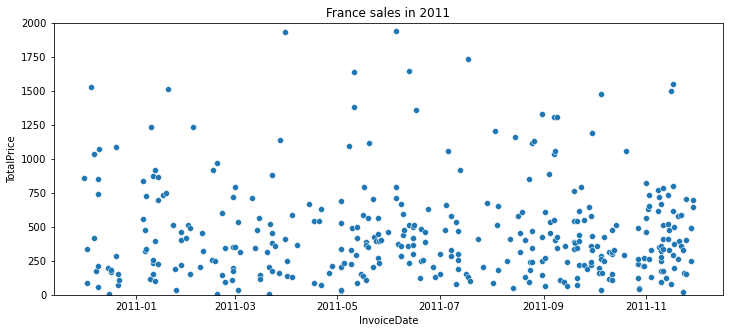

In [79]:
#Draw a scatterplot on the France Invoices Report dataframe showing Invoice totals over 2011
plt.figure(figsize=(12,5))
sns.scatterplot(data=ctry_rprt("France"), x='InvoiceDate', y='TotalPrice')
plt.ylim([0, 2000])
plt.title('France sales in 2011')
# We have been doing steady business with France averaging $500 per invoice     

## Alizon.com's Periodic Sales Analysis

In [80]:
# Review our retail data frame
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
512922,579520,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-11-29 18:14:00,0.39,12748,United Kingdom,0.39
512923,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748,United Kingdom,0.29
512924,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748,United Kingdom,0.29
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748,United Kingdom,0.39


## Breakup Retail Dataframe into Monthly Sales dataframes 
Isolate monthly sales data into separate dataframes

In [81]:
# example of python's cryptic but powerful list comprehension feature
a_list = [x for x in (1, 2, 3, 4, 5)]
a_list
# we have created a list from the iteratable tuple of 1 to 5

[1, 2, 3, 4, 5]

In [82]:
# An example of iterating though a dictionary
a_dict = {
            'a':'apple',
            'b':'boy',
            'c':'cat',
            'd':'dog'
        }
for alphabet,thingy in a_dict.items():
    print(alphabet)
    print(thingy)
# some iterable objects like dictionary items yield two things per iteration

a
apple
b
boy
c
cat
d
dog


In [83]:
# An example of list comprehension with above dictionary
things_list = [thing for _,thing in a_dict.items()]
things_list
# we use the underscore when we don't need to use one of the 2 things yielded by the iterable object

['apple', 'boy', 'cat', 'dog']

In [84]:
# Pass the pd.Grouper function into the groupby dataframe method to group the dataframe rows by the InvoiceDate months.
g = retail_df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))
monthly_sales_dfs = [group for _,group in g]
dec_df, jan_df, feb_df = monthly_sales_dfs[0], monthly_sales_dfs[1], monthly_sales_dfs[2]
mar_df, apr_df, may_df = monthly_sales_dfs[3], monthly_sales_dfs[4], monthly_sales_dfs[5]
jun_df, jul_df, aug_df = monthly_sales_dfs[6], monthly_sales_dfs[7], monthly_sales_dfs[8]
sep_df, oct_df, nov_df = monthly_sales_dfs[9], monthly_sales_dfs[10], monthly_sales_dfs[11]
dec_df
# Note that december monthly data is from the year 2010's invoices
# It is definitely easier to work with december data in dec_df than in monthly_sales_dfs[0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
42448,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116,United Kingdom,1.25
42449,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116,United Kingdom,1.69
42450,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116,United Kingdom,1.69
42451,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116,United Kingdom,9.90


## Alizon.com's Monthly Sales Analysis

In [85]:
# How much did we sell in January? 
jan_sales = round(jan_df["TotalPrice"].sum())
jan_sales
# we pulled in over half a million dollars in january

569351

<AxesSubplot:xlabel='InvoiceDate', ylabel='TotalPrice'>

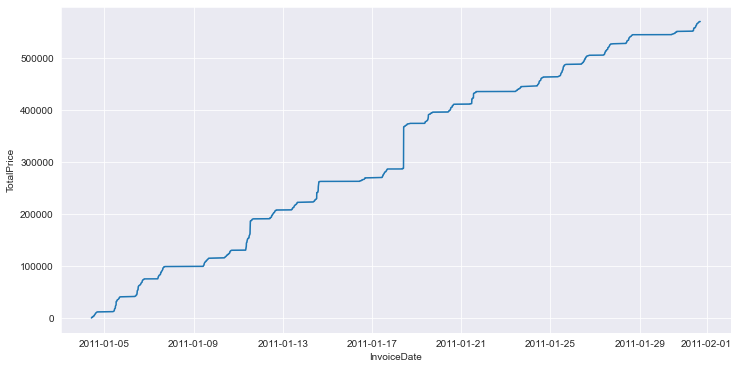

In [86]:
# Draw a lineplot on the january invoices dataframe showing cumulative Total price over Invoice date
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(x=jan_df["InvoiceDate"], y=jan_df["TotalPrice"].cumsum())
# This will take over a minute to come up, so please be patient
# The climbing sales line we love to see 

In [87]:
# Create a list of the monthly total sales
monthly_sales = [round(monthly_sales_dfs[i].TotalPrice.sum()) for i in range(12)]
monthly_sales
# Note that december monthly data which is from the year 2010's invoices, is the 1st in the list

[572486,
 569351,
 446712,
 590588,
 459092,
 674292,
 660443,
 598543,
 642354,
 949407,
 1017775,
 1117351]

In [88]:
# Create a list of the monthly sale quantities
monthly_qtys = [monthly_sales_dfs[i].Quantity.sum() for i in range(12)]
monthly_qtys
# Note that december monthly data which is from the year 2010's invoices, is the 1st in the list

[312070,
 349058,
 265538,
 348416,
 292117,
 373579,
 363659,
 369329,
 398092,
 544376,
 592650,
 640708]

In [89]:
# Create a list of the month names
month_names = pd.date_range('2010-12-01','2011-11-30', 
              freq='MS').strftime("%Y-%b").tolist()
month_names

['2010-Dec',
 '2011-Jan',
 '2011-Feb',
 '2011-Mar',
 '2011-Apr',
 '2011-May',
 '2011-Jun',
 '2011-Jul',
 '2011-Aug',
 '2011-Sep',
 '2011-Oct',
 '2011-Nov']

In [90]:
# Create a dataframe of the monthly sales data
months_df = pd.DataFrame({
    'Month':    month_names,
    'Amount':   monthly_sales,
    'Quantity': monthly_qtys
    })
months_df
# It shows our sales and quantities in each of the months 

,Month,Amount,Quantity
0,2010-Dec,572486,312070
1,2011-Jan,569351,349058
2,2011-Feb,446712,265538
3,2011-Mar,590588,348416
4,2011-Apr,459092,292117
5,2011-May,674292,373579
6,2011-Jun,660443,363659
7,2011-Jul,598543,369329
8,2011-Aug,642354,398092
9,2011-Sep,949407,544376


In [91]:
# Which is our best sales month?
months_df.sort_values('Amount', ascending=False)
# We did our best sales in November and worst in February

,Month,Amount,Quantity
11,2011-Nov,1117351,640708
10,2011-Oct,1017775,592650
9,2011-Sep,949407,544376
5,2011-May,674292,373579
6,2011-Jun,660443,363659
8,2011-Aug,642354,398092
7,2011-Jul,598543,369329
3,2011-Mar,590588,348416
0,2010-Dec,572486,312070
1,2011-Jan,569351,349058


<AxesSubplot:xlabel='Month', ylabel='Amount'>

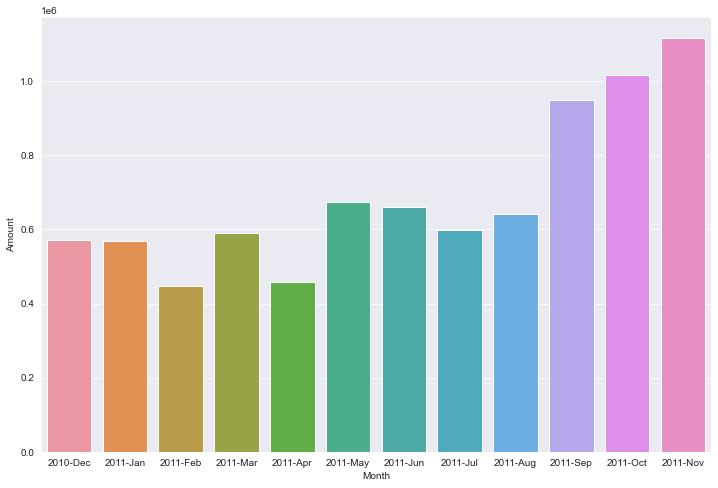

In [92]:
# Create a bar chart of our monthly sales amounts
plt.figure(figsize=(12, 8))
sns.barplot(data=months_df, x='Month', y='Amount')
# We seem to do well towards the end of the year

<AxesSubplot:xlabel='Month', ylabel='Amount'>

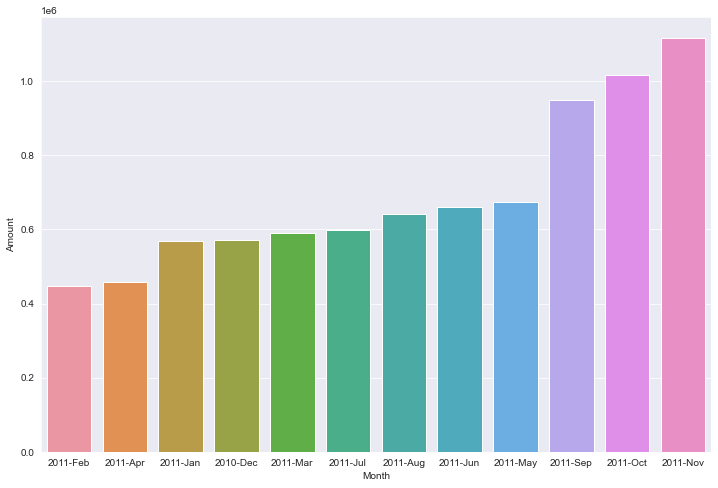

In [93]:
# Create a bar chart of our monthly sales amounts in ascending order
plt.figure(figsize=(12, 8))
sns.barplot(data=months_df.sort_values('Amount'), x='Month', y='Amount')
# We seem to doing better towards the end of the year

<AxesSubplot:xlabel='Month', ylabel='Quantity'>

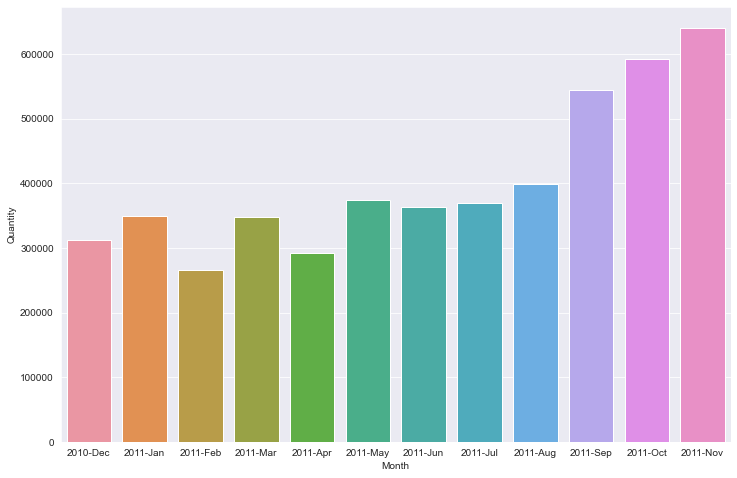

In [94]:
# Create a bar chart of our monthly sales quantities
plt.figure(figsize=(12, 8))
sns.barplot(data=months_df, x='Month', y='Quantity')
# Figures, in spring time customers would prefer to walk or drive to a brick and mortar store

## Where to Pivot for Improvement?

In [95]:
# let us review our weakest sale month
feb_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
77628,542776,21671,RED SPOT CERAMIC DRAWER KNOB,48,2011-02-01 08:23:00,1.25,15240,United Kingdom,60.00
77629,542776,21668,RED STRIPE CERAMIC DRAWER KNOB,12,2011-02-01 08:23:00,1.25,15240,United Kingdom,15.00
77630,542776,21670,BLUE SPOT CERAMIC DRAWER KNOB,12,2011-02-01 08:23:00,1.25,15240,United Kingdom,15.00
77631,542776,17013D,ORIGAMI ROSE INCENSE IN TUBE,96,2011-02-01 08:23:00,0.42,15240,United Kingdom,40.32
77632,542776,17096,ASSORTED LAQUERED INCENSE HOLDERS,48,2011-02-01 08:23:00,0.21,15240,United Kingdom,10.08
...,...,...,...,...,...,...,...,...,...
105329,545218,85099B,JUMBO BAG RED RETROSPOT,10,2011-02-28 17:01:00,1.95,17462,United Kingdom,19.50
105330,545218,21936,RED RETROSPOT PICNIC BAG,5,2011-02-28 17:01:00,2.95,17462,United Kingdom,14.75
105331,545218,21932,SCANDINAVIAN PAISLEY PICNIC BAG,5,2011-02-28 17:01:00,2.95,17462,United Kingdom,14.75
105332,545218,22386,JUMBO BAG PINK POLKADOT,10,2011-02-28 17:01:00,1.95,17462,United Kingdom,19.50


In [96]:
# Create a dataframe with the item sales quantities in the single digit 
qty_mask = (feb_df.Quantity < 10)
feb_low_df = feb_df.loc[qty_mask].copy()
feb_low_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
77635,542776,79321,CHILLI LIGHTS,4,2011-02-01 08:23:00,4.95,15240,United Kingdom,19.80
77636,542776,21843,RED RETROSPOT CAKE STAND,1,2011-02-01 08:23:00,10.95,15240,United Kingdom,10.95
77637,542776,22835,HOT WATER BOTTLE I AM SO POORLY,4,2011-02-01 08:23:00,4.65,15240,United Kingdom,18.60
77640,542776,21218,RED SPOTTY BISCUIT TIN,6,2011-02-01 08:23:00,3.75,15240,United Kingdom,22.50
77641,542776,21485,RETROSPOT HEART HOT WATER BOTTLE,3,2011-02-01 08:23:00,4.95,15240,United Kingdom,14.85
...,...,...,...,...,...,...,...,...,...
105323,545218,22150,3 STRIPEY MICE FELTCRAFT,6,2011-02-28 17:01:00,1.95,17462,United Kingdom,11.70
105326,545218,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-02-28 17:01:00,4.95,17462,United Kingdom,29.70
105330,545218,21936,RED RETROSPOT PICNIC BAG,5,2011-02-28 17:01:00,2.95,17462,United Kingdom,14.75
105331,545218,21932,SCANDINAVIAN PAISLEY PICNIC BAG,5,2011-02-28 17:01:00,2.95,17462,United Kingdom,14.75


In [97]:
# Review the column data types of the february-low data frame
feb_low_df.info()
# Not ethat InvoiceDate is a DateTime column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12479 entries, 77635 to 105333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    12479 non-null  object        
 1   StockCode    12479 non-null  object        
 2   Description  12479 non-null  object        
 3   Quantity     12479 non-null  int64         
 4   InvoiceDate  12479 non-null  datetime64[ns]
 5   UnitPrice    12479 non-null  float64       
 6   CustomerID   12479 non-null  string        
 7   Country      12479 non-null  object        
 8   TotalPrice   12479 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), string(1)
memory usage: 974.9+ KB


In [98]:
# Trim away the trailing time part in the InvoiceDate column
feb_low_df['InvoiceDate'] = feb_low_df.InvoiceDate.dt.date
feb_low_df
# We have also converted the InvoiceDate to a datetime column

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
77635,542776,79321,CHILLI LIGHTS,4,2011-02-01,4.95,15240,United Kingdom,19.80
77636,542776,21843,RED RETROSPOT CAKE STAND,1,2011-02-01,10.95,15240,United Kingdom,10.95
77637,542776,22835,HOT WATER BOTTLE I AM SO POORLY,4,2011-02-01,4.65,15240,United Kingdom,18.60
77640,542776,21218,RED SPOTTY BISCUIT TIN,6,2011-02-01,3.75,15240,United Kingdom,22.50
77641,542776,21485,RETROSPOT HEART HOT WATER BOTTLE,3,2011-02-01,4.95,15240,United Kingdom,14.85
...,...,...,...,...,...,...,...,...,...
105323,545218,22150,3 STRIPEY MICE FELTCRAFT,6,2011-02-28,1.95,17462,United Kingdom,11.70
105326,545218,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-02-28,4.95,17462,United Kingdom,29.70
105330,545218,21936,RED RETROSPOT PICNIC BAG,5,2011-02-28,2.95,17462,United Kingdom,14.75
105331,545218,21932,SCANDINAVIAN PAISLEY PICNIC BAG,5,2011-02-28,2.95,17462,United Kingdom,14.75


In [99]:
# Generate a pivot table of the sale quantities indexed on customers, aggregating the invoice quantities 
feb_cust_pt = feb_low_df.pivot_table(index='CustomerID',columns='InvoiceDate',values='Quantity',aggfunc='sum',margins=True).fillna(' ').copy()
feb_cust_pt
# The blank cells denote days when the customer did not place any order 

InvoiceDate,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-06,2011-02-07,2011-02-08,2011-02-09,2011-02-10,2011-02-11,...,2011-02-18,2011-02-20,2011-02-21,2011-02-22,2011-02-23,2011-02-24,2011-02-25,2011-02-27,2011-02-28,All
CustomerID,,,,,,,,,,,,,,,,,,,,,
12350,,7.0,,,,,,,,,...,,,,,,,,,,7
12352,,,,,,,,,,,...,,,,,,,,,,38
12359,,,,,,183.0,,,,,...,,,,,,,,,,183
12361,,,,,,,,,,,...,,,,,,,13.0,,,13
12362,,,,,,,,,,,...,,,,,,,,,,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18231,,,,,,,,,,,...,,,,,,12.0,,,,12
18250,,39.0,,,,,,,,,...,,,,,,,,,,39
18257,,,,,,,,,,,...,,,,,,,,,,36


In [100]:
# In the pivot table, short-list the 20 lowest buying customers
feb_cust_pt.sort_values('All').head(20)
# The table extract shows customers with the least sale activity in the month of february

InvoiceDate,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-06,2011-02-07,2011-02-08,2011-02-09,2011-02-10,2011-02-11,...,2011-02-18,2011-02-20,2011-02-21,2011-02-22,2011-02-23,2011-02-24,2011-02-25,2011-02-27,2011-02-28,All
CustomerID,,,,,,,,,,,,,,,,,,,,,
16692,,,,,,,,,,,...,,,,,1.0,,,,,1
16027,,,,,,,,,1.0,,...,,,,,,,,,,1
12414,,1.0,,,,,,,,,...,,,,,,,,,,1
14744,,,,,,,,,,,...,,,,,,,,,,1
13983,,,,,,2.0,,,,,...,,,,,,,,,,2
12583,,,,,,,,,2.0,,...,,,,,,,,,,2
13305,,,,,,,,,,,...,,,,,,,,,,2
17867,,,,,,,,,,,...,,,,,,2.0,,,,2
15061,,,,,,,,,,2.0,...,,,,,,,,,,2


## Alizon.com's Worst Selling Items

In [101]:
# Which is our worst selling item, sale-amount wise?
worst_selr_df = retail_df.groupby('Description').sum() \
                [['Quantity', 'TotalPrice']].sort_values('TotalPrice').head(10)
worst_selr_df.reset_index(inplace=True)
worst_selr_df
# That is the list of our bottom selling items, dollar amount wise

,Description,Quantity,TotalPrice
0,PADS TO MATCH ALL CUSHIONS,3,0.003
1,HEN HOUSE W CHICK IN NEST,1,0.420
2,SET 12 COLOURING PENCILS DOILEY,1,0.650
3,VINTAGE BLUE TINSEL REEL,2,0.840
4,PURPLE FRANGIPANI HAIRCLIP,1,0.850
5,PINK CRYSTAL GUITAR PHONE CHARM,1,0.850
6,HAPPY BIRTHDAY CARD TEDDY/CAKE,5,0.950
7,CAT WITH SUNGLASSES BLANK CARD,5,0.950
8,60 GOLD AND SILVER FAIRY CAKE CASES,2,1.100
9,SET 36 COLOURING PENCILS DOILEY,1,1.250


Text(0.5, 1.0, "Alizon.com's Bottom Sellers")

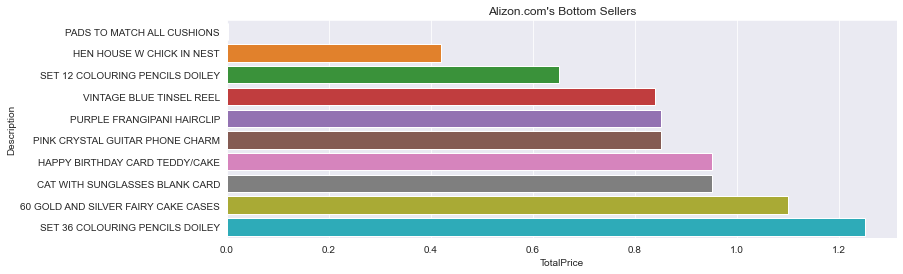

In [102]:
# Draw a horizontal bar plot for TotalPrice on the top 10 selling items, value wise
plt.figure(figsize=(12, 4))
sns.barplot(data=worst_selr_df, x='TotalPrice', y='Description')
plt.title("Alizon.com's Bottom Sellers")
# PADS TO MATCH ALL CUSHIONS is our losing item of the year

In [103]:
# let us review our weakest sale month
feb_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
77628,542776,21671,RED SPOT CERAMIC DRAWER KNOB,48,2011-02-01 08:23:00,1.25,15240,United Kingdom,60.00
77629,542776,21668,RED STRIPE CERAMIC DRAWER KNOB,12,2011-02-01 08:23:00,1.25,15240,United Kingdom,15.00
77630,542776,21670,BLUE SPOT CERAMIC DRAWER KNOB,12,2011-02-01 08:23:00,1.25,15240,United Kingdom,15.00
77631,542776,17013D,ORIGAMI ROSE INCENSE IN TUBE,96,2011-02-01 08:23:00,0.42,15240,United Kingdom,40.32
77632,542776,17096,ASSORTED LAQUERED INCENSE HOLDERS,48,2011-02-01 08:23:00,0.21,15240,United Kingdom,10.08
...,...,...,...,...,...,...,...,...,...
105329,545218,85099B,JUMBO BAG RED RETROSPOT,10,2011-02-28 17:01:00,1.95,17462,United Kingdom,19.50
105330,545218,21936,RED RETROSPOT PICNIC BAG,5,2011-02-28 17:01:00,2.95,17462,United Kingdom,14.75
105331,545218,21932,SCANDINAVIAN PAISLEY PICNIC BAG,5,2011-02-28 17:01:00,2.95,17462,United Kingdom,14.75
105332,545218,22386,JUMBO BAG PINK POLKADOT,10,2011-02-28 17:01:00,1.95,17462,United Kingdom,19.50


In [104]:
# Review our dataframe with the item sales quantities in the single digit 
feb_low_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
77635,542776,79321,CHILLI LIGHTS,4,2011-02-01,4.95,15240,United Kingdom,19.80
77636,542776,21843,RED RETROSPOT CAKE STAND,1,2011-02-01,10.95,15240,United Kingdom,10.95
77637,542776,22835,HOT WATER BOTTLE I AM SO POORLY,4,2011-02-01,4.65,15240,United Kingdom,18.60
77640,542776,21218,RED SPOTTY BISCUIT TIN,6,2011-02-01,3.75,15240,United Kingdom,22.50
77641,542776,21485,RETROSPOT HEART HOT WATER BOTTLE,3,2011-02-01,4.95,15240,United Kingdom,14.85
...,...,...,...,...,...,...,...,...,...
105323,545218,22150,3 STRIPEY MICE FELTCRAFT,6,2011-02-28,1.95,17462,United Kingdom,11.70
105326,545218,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-02-28,4.95,17462,United Kingdom,29.70
105330,545218,21936,RED RETROSPOT PICNIC BAG,5,2011-02-28,2.95,17462,United Kingdom,14.75
105331,545218,21932,SCANDINAVIAN PAISLEY PICNIC BAG,5,2011-02-28,2.95,17462,United Kingdom,14.75


In [105]:
# Generate a pivot table of the sale quantities indexed on Description, aggregating the invoice quantities 
feb_item_pt = feb_low_df.pivot_table(index='Description',columns='InvoiceDate',values='Quantity',aggfunc='sum',margins=True).fillna(' ').copy()
feb_item_pt
# The blank cells denote days when the item did not sell in any order 

InvoiceDate,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-06,2011-02-07,2011-02-08,2011-02-09,2011-02-10,2011-02-11,...,2011-02-18,2011-02-20,2011-02-21,2011-02-22,2011-02-23,2011-02-24,2011-02-25,2011-02-27,2011-02-28,All
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,,,,,,,,,,,...,,,,,,,,,1.0,1
OVAL WALL MIRROR DIAMANTE,,1.0,,,1.0,,,,,,...,,,,,,,,2.0,,4
SET 2 TEA TOWELS I LOVE LONDON,4.0,6.0,,6.0,,24.0,,,,9.0,...,8.0,,9.0,8.0,,13.0,,4.0,6.0,106
12 COLOURED PARTY BALLOONS,,,,,,,,,,,...,,,9.0,,,,,,,9
12 DAISY PEGS IN WOOD BOX,,,,6.0,,,,,,,...,,,,1.0,,,,,,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC HEART LATTICE TRAY OVAL,,,,,,,,,,,...,,,,,1.0,,,,,1
ZINC METAL HEART DECORATION,,2.0,2.0,,,,,,8.0,2.0,...,,3.0,2.0,,,,,4.0,,39
ZINC TOP 2 DOOR WOODEN SHELF,,,,,,,,,,,...,,,,,,,,,,1


In [106]:
# In the pivot table, short-list the 20 lowest selling items
feb_item_pt.sort_values('All').head(20)
# The table extract shows items with the least sale activity in the month of february

InvoiceDate,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-06,2011-02-07,2011-02-08,2011-02-09,2011-02-10,2011-02-11,...,2011-02-18,2011-02-20,2011-02-21,2011-02-22,2011-02-23,2011-02-24,2011-02-25,2011-02-27,2011-02-28,All
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,,,,,,,,,,,...,,,,,,,,,1.0,1
PINK/WHITE RIBBED MELAMINE JUG,,,,,,,,,,,...,,1.0,,,,,,,,1
CHRYSANTHEMUM JOURNAL,,,,,,,,,,,...,,,,,,,,,,1
"POCKET MIRROR ""GLAMOROUS""",,,,,,,1.0,,,,...,,,,,,,,,,1
CHOCOLATE 1 WICK MORRIS BOX CANDLE,,,,,,,,,1.0,,...,,,,,,,,,,1
WORLD WAR 2 GLIDERS ASSTD DESIGNS,,,,1.0,,,,,,,...,,,,,,,,,,1
WHITE HEART CONFETTI IN TUBE,,1.0,,,,,,,,,...,,,,,,,,,,1
PURPLE AMETHYST NECKLACE W TASSEL,,,,,,,,,,,...,,,,,,,,,,1
RASPBERRY ANT COPPER FLOWER NECKLAC,,,,,,,,,,,...,,1.0,,,,,,,,1


## Assemble Quarterly Sales Dataframes  from Monthly Sales Dataframes
Create quarterly sales data from the monthly dataframes

In [107]:
# Let's concatenate every 3 month's sales data into a quarterly dataframe.
q1_df = pd.concat([jan_df, feb_df, mar_df])
q2_df = pd.concat([apr_df, may_df, jun_df])
q3_df = pd.concat([jul_df, aug_df, sep_df])
q4_df = pd.concat([oct_df, nov_df, dec_df])
q4_df
# Note that quarter 4's dataframe has invoices from October and November 2011 and December 2010 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
370931,569203,79321,CHILLI LIGHTS,48,2011-10-02 10:32:00,4.95,16353,United Kingdom,237.60
370932,569203,21154,RED RETROSPOT OVEN GLOVE,20,2011-10-02 10:32:00,1.25,16353,United Kingdom,25.00
370933,569204,21790,VINTAGE SNAP CARDS,4,2011-10-02 10:43:00,0.85,16591,United Kingdom,3.40
370934,569204,23284,DOORMAT KEEP CALM AND COME IN,15,2011-10-02 10:43:00,7.08,16591,United Kingdom,106.20
370935,569204,23355,HOT WATER BOTTLE KEEP CALM,4,2011-10-02 10:43:00,4.95,16591,United Kingdom,19.80
...,...,...,...,...,...,...,...,...,...
42448,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116,United Kingdom,1.25
42449,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116,United Kingdom,1.69
42450,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116,United Kingdom,1.69
42451,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116,United Kingdom,9.90


## Alizon.com's Quarterly Sales Analysis

In [108]:
# How much did we sell in in the 1st quarter? 
round(q1_df["TotalPrice"].sum())
# we pulled in over one and a half million dollars in the 1st quarter

1606651

<AxesSubplot:xlabel='InvoiceDate', ylabel='TotalPrice'>

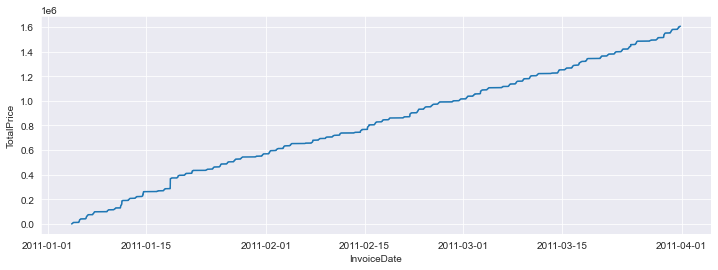

In [109]:
# Draw a lineplot on the 1st quarter invoices dataframe showing cumulative Total price over Invoice date
plt.figure(figsize=(12,4))
sns.lineplot(x=q1_df["InvoiceDate"], y=q1_df["TotalPrice"].cumsum())
# This will take a couple of minutes to come up
# The climbing sales line we love to see 

In [110]:
# Create a list of the quarterly total sales
quarter_sales = [round(q1_df.TotalPrice.sum()),
                 round(q2_df.TotalPrice.sum()),
                 round(q3_df.TotalPrice.sum()),
                 round(q4_df.TotalPrice.sum()),
                ]
quarter_sales
# Note that december monthly sales data which is from the year 2010's invoices, is in the 4th quarter in the list

[1606651, 1793826, 2190305, 2707612]

In [111]:
# Create a list of the quarterly sale quantities
quarter_qtys = [q1_df.Quantity.sum(),
                q2_df.Quantity.sum(),
                q3_df.Quantity.sum(),
                q4_df.Quantity.sum()]
quarter_qtys
# Note that december monthly quantities data which is from the year 2010's invoices, is in the 4th quarter in the list

[963012, 1029355, 1311797, 1545428]

In [112]:
# Create a list of the quarter names
quarter_names = ['First Quarter (Q1)',
                 'Second Quarter (Q2)',
                 'Third Quarter (Q3)',
                 'Fourth Quarter (Q4)']
quarter_names

['First Quarter (Q1)',
 'Second Quarter (Q2)',
 'Third Quarter (Q3)',
 'Fourth Quarter (Q4)']

In [113]:
# Create a dataframe of the quarterly sales data
quarters_df = pd.DataFrame({
    'Quarter':  quarter_names,
    'Amount':   quarter_sales,
    'Quantity': quarter_qtys
    })
quarters_df
# It shows our sales and quantities in each of the quarters 

,Quarter,Amount,Quantity
0,First Quarter (Q1),1606651,963012
1,Second Quarter (Q2),1793826,1029355
2,Third Quarter (Q3),2190305,1311797
3,Fourth Quarter (Q4),2707612,1545428


In [114]:
# Which is our best sales quarter?
quarters_df.sort_values('Amount', ascending=False)
# We did our best sales in the last quarter and worst in the first

,Quarter,Amount,Quantity
3,Fourth Quarter (Q4),2707612,1545428
2,Third Quarter (Q3),2190305,1311797
1,Second Quarter (Q2),1793826,1029355
0,First Quarter (Q1),1606651,963012


Text(0.5, 1.0, 'Alizon.com Quarterly Sales')

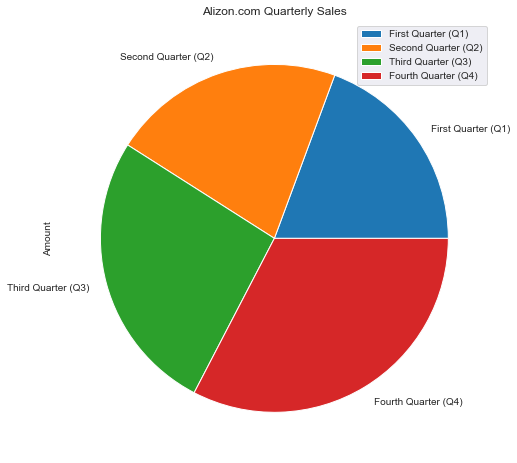

In [115]:
# Draw a pie plot of Alizon.com's quarterly sales
quarters_df.set_index('Quarter').head(10).plot.pie(figsize=(8, 8), y='Amount')
plt.title('Alizon.com Quarterly Sales')
# The last quarter has the major chunk of the pie

Text(0.5, 1.0, 'Alizon.com Quarterly Sales Quantities')

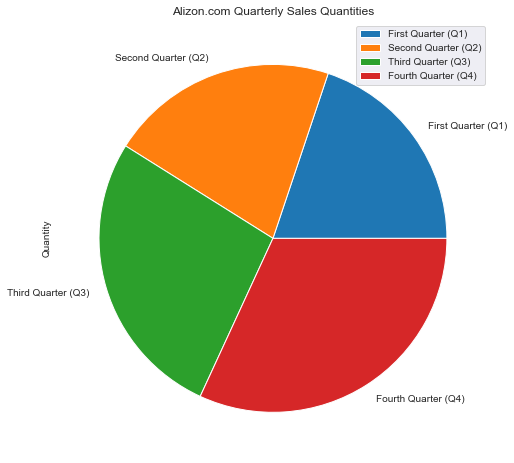

In [116]:
# Draw a pie plot of Alizon.com's quarterly sales quantities
quarters_df.set_index('Quarter').head(10).plot.pie(figsize=(8, 8), y='Quantity')
plt.title('Alizon.com Quarterly Sales Quantities')
# The last quarter has the major chunk of the volume pie also    

# Download this Project notebook and Data File

Right-click and select 'Save link as' to download <a href="ecomm-data-analysis.ipynb">this notebook</a>

Click <a href="https://archive.ics.uci.edu/ml/datasets/Online+Retail">here</a> to go and download ecomm retail dataset

In [117]:
# Generate a list of the libraries and their versions in this project environment
!conda list

# packages in environment at C:\Users\Owner\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.05                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        2.0.3                    py38_0  
anaconda-project          0.9.1              pyhd3eb1b0_1  
anyio                     2.2.0            py38haa95532_2  
appdirs                   1.4.4                      py_0  
argh                      0.26.2                   py38_0  
argon2-cffi               20.1.0           py38h2bbff1b_1  
asn1crypto                1.4.0                      py_0  
astroid                   2.5              py38haa95532_1  
astropy                   4.2.1            py38h2bbff1b_1  
async_generator           1.10               pyhd3eb1b0_0  
atomicwrites              1.4.0     

pytz                      2021.1             pyhd3eb1b0_0  
pywavelets                1.1.1            py38he774522_2  
pywin32                   227              py38he774522_1  
pywin32-ctypes            0.2.0                 py38_1000  
pywinpty                  0.5.7                    py38_0  
pyyaml                    5.4.1            py38h2bbff1b_1  
pyzmq                     20.0.0           py38hd77b12b_1  
qdarkstyle                2.8.1                      py_0  
qt                        5.9.7            vc14h73c81de_0  
qtawesome                 1.0.2              pyhd3eb1b0_0  
qtconsole                 5.0.3              pyhd3eb1b0_0  
qtpy                      1.9.0                      py_0  
regex                     2021.4.4         py38h2bbff1b_0  
requests                  2.25.1             pyhd3eb1b0_0  
rope                      0.18.0                     py_0  
rtree                     0.9.7            py38h2eaa2aa_1  
ruamel_yaml               0.15.100      